In [1]:
import re
import regex
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import emoji 
from collections import Counter
from os import path 
from PIL import Image 
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator

%matplotlib inline

# Preprocessing the data

In [2]:
def startsWithDateAndTime(s):
    pattern = '([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern , s)
    if result:
        return True 
    return False


# Extract the username from the chats

In [3]:
def FindAuthor(s):
    s = s.split(':')
    if len(s) == 2:
        return True 
    else:
        False 

In [4]:
def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    date, time = dateTime.split(', ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None 
        
    return date,time,author,message

In [5]:
parsedData = [] #list to keep the track of data so it can be used by a pandas dataframe 

conversation ='WhatsApp Chat with Seekers.txt'

with open(conversation , encoding = 'utf-8') as fp:
    fp.readline() #skipping the first line of the file as it contains information related to end-to-end encryption
    messageBuffer = []
    date,time,author = None,None,None
    
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if len(messageBuffer):
                parsedData.append([date,time,author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date,time,author,message =getDataPoint(line)
            messageBuffer.append(message)
            
        else:
            messageBuffer.append(line)


In [6]:
df = pd.DataFrame(parsedData , columns = ['Date','Time','Author','Message'])
df['Date'] = pd.to_datetime(df['Date'])
df.tail(20)

,Date,Time,Author,Message
430,2021-01-04,11:24 PM,Shitanshu Soni Ips Ec,Kab tak pareshan karoge yaar usko?
431,2021-01-04,11:24 PM,Geet Shrivastava Whatsapp,Ankit ko karein kya ab
432,2021-01-04,11:24 PM,Ganesh Shankar Upadhyay,😂😂😂😂😂😂😂😂 bahut hi umda peshkash
433,2021-01-04,11:25 PM,Ganesh Shankar Upadhyay,Mohit ka koi jawaab nahi aaya bhaiya
434,2021-01-04,11:25 PM,Shitanshu Soni Ips Ec,"Usko karna kaha padta hai, wo khud hi pareshan..."
435,2021-01-04,11:26 PM,Geet Shrivastava Whatsapp,🙏🙏🙏 dhanywaad
436,2021-01-04,11:29 PM,Teena IPS EC,😂😂😂
437,2021-01-05,12:04 AM,Ganesh Shankar Upadhyay,IMG-20210105-WA0000.jpg (file attached)
438,2021-01-05,12:05 AM,Geet Shrivastava Whatsapp,That's how you do it
439,2021-01-05,12:05 AM,Ganesh Shankar Upadhyay,Yeahhhh


In [7]:
df.Author.unique()

array(['Geet Shrivastava Whatsapp', 'Mohit Jain New',
       'Ankit Gupta EC IPS', 'Teena IPS EC', 'Ganesh Shankar Upadhyay',
       'Shitanshu Soni Ips Ec', None, 'Anshul Mahajan',
       'Rishab Sisodia Ips Ec', 'Raksha Thakur Ips', 'Aditi Pandey New',
       'Shriya Barnwal IPS', '+91 85301 46204', 'Meenal Ips Ec'],
      dtype=object)

# Group Chat Analysis

In [8]:
media_messages = df[df['Message'] == '&amp;lt;Media omitted&amp;gt;'].shape[0]
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
total_messages = len(df['Message'])
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Seekers")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Seekers
Messages: 450
Media: 0
Emojis: 216
Links: 14


In [9]:
media_messages_df = df[df['Message'] == '&amp;lt;Media omitted&amp;gt;']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s :len(s.split(' ')))
messages_df['MessageCount'] = 1
messages_df = messages_df.iloc[1:]

l = ['Geet Shrivastava Whatsapp', 'Mohit Jain New', 'Ganesh Shankar Upadhyay']
for i in range(len(l)):
    #Filtering out the messages of a particular user
    req_df = messages_df[messages_df['Author'] == l[i]]
    
    #req_df will contain the messages of one particular user only
    print(f'Stats of {l[i]} -')
    
    #shape will print number of rows which indirectly means the number of messages
    print('Messages sent' , req_df.shape[0])
    
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message' , words_per_message)
    
    #Media consists of message
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media messages sent' , media)
    
    #emojis consists of total messages 
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis sent' , emojis)
    
    #links consists of total links 
    links = sum(req_df['urlcount'])
    print('Links sent', links)
    print()

Stats of Geet Shrivastava Whatsapp -
Messages sent 110
Words per message 4.9
Media messages sent 0
Emojis sent 22
Links sent 0

Stats of Mohit Jain New -
Messages sent 33
Words per message 3.5454545454545454
Media messages sent 0
Emojis sent 17
Links sent 0

Stats of Ganesh Shankar Upadhyay -
Messages sent 89
Words per message 4.157303370786517
Media messages sent 0
Emojis sent 68
Links sent 0



# Emojis sent in the group

In [10]:
total_emoji_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emoji_list))
emoji_dict = sorted(emoji_dict.items() ,key = lambda x : x[1] , reverse = True)
for i in emoji_dict:
    print(i)

('😂', 70)
('😀', 16)
('🤣', 11)
('🎉', 11)
('🎂', 11)
('🙏', 10)
('🙏🏻', 8)
('🥳', 8)
('🤘🏻', 8)
('😛', 5)
('😊', 5)
('☺️', 4)
('😆', 4)
('👏🏻', 4)
('🚬', 3)
('🎊', 3)
('🎄', 3)
('🤟', 2)
('😜', 2)
('😍', 2)
('🤷🏻\u200d♂️', 2)
('😴', 2)
('💤', 2)
('💐', 1)
('👩\u200d🍳', 1)
('✌🏻', 1)
('😃', 1)
('🙇\u200d♂️', 1)
('🦇', 1)
('🤐', 1)
('🔥', 1)
('👌🏻', 1)
('😎', 1)
('❤️', 1)
('😇', 1)
('🌹', 1)
('😋', 1)
('👍', 1)
('👍🏻', 1)
('🎇', 1)
('🤔', 1)
('🙇🏻\u200d♂️', 1)
('🥱', 1)


# Wordcloud for people

There are 12317 number of words in the wordcloud


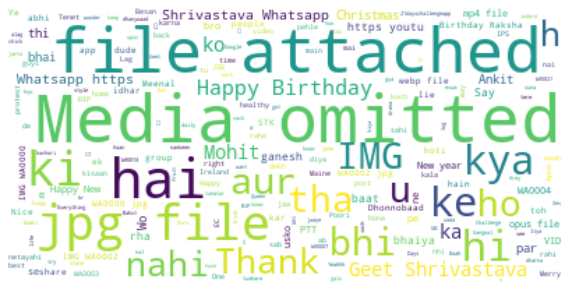

In [11]:
text = ' '.join(review for review in messages_df.Message)
print('There are {} number of words in the wordcloud'.format(len(text)))

stopwords = set(STOPWORDS)

#Generate a wordcloud Image 
wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

#Display the generated image 
plt.figure(figsize = (10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Author Name is  Geet Shrivastava Whatsapp


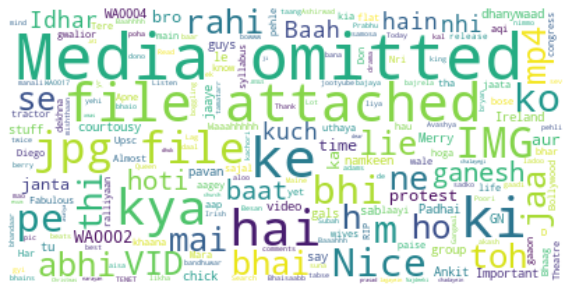

Author Name is  Mohit Jain New


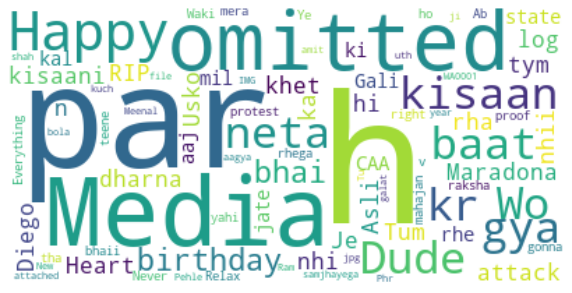

Author Name is  Ganesh Shankar Upadhyay


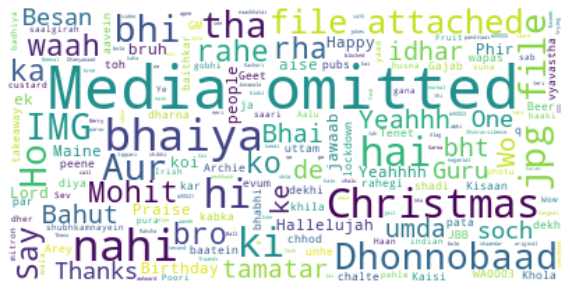

In [12]:
l = ['Geet Shrivastava Whatsapp', 'Mohit Jain New', 'Ganesh Shankar Upadhyay']
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = ' '.join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    
    #Generate a wordcloud image 
    print('Author Name is ' , l[i])
    
    #Generate a wordcloud Image 
    wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

    #Display the generated image 
    plt.figure(figsize = (10,15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()